In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("darkgrid")

## Data

In [2]:
TS = pd.read_excel("./Project 2_2022.xlsx", sheet_name="Data")
TS.Date = TS.Date.apply(pd.Timestamp)
TS = TS.set_index("Date")

In [3]:
TS.head()

,Income,Outcome,Balance
Date,,,
2017-01-09,1.343028,1.487865,-0.155904
2017-01-10,1.068610,1.194182,-0.125572
2017-01-11,0.944429,0.936663,0.007767
2017-01-12,1.672202,0.875379,0.800391
2017-01-13,0.955924,0.975645,-0.019721


## Anomalies

Описание этого говна через квантильный коридор

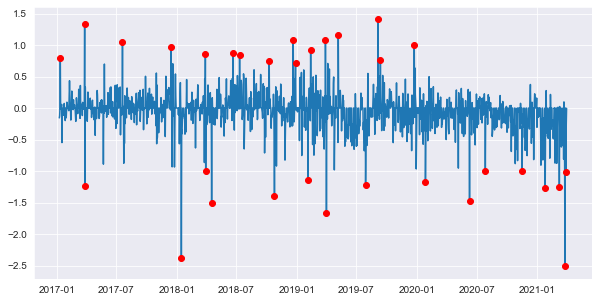

In [4]:
from modules.anomaly import detect_anomalies

anomaly_indexes = detect_anomalies(TS.Balance, thres=0.01, visualize=True)

In [5]:
anomaly_indexes.tolist()

[Timestamp('2017-01-12 00:00:00'),
 Timestamp('2017-03-27 00:00:00'),
 Timestamp('2017-07-20 00:00:00'),
 Timestamp('2017-12-15 00:00:00'),
 Timestamp('2018-03-29 00:00:00'),
 Timestamp('2018-06-21 00:00:00'),
 Timestamp('2018-07-11 00:00:00'),
 Timestamp('2018-10-09 00:00:00'),
 Timestamp('2018-12-21 00:00:00'),
 Timestamp('2018-12-28 00:00:00'),
 Timestamp('2019-02-12 00:00:00'),
 Timestamp('2019-03-29 00:00:00'),
 Timestamp('2019-05-07 00:00:00'),
 Timestamp('2019-09-05 00:00:00'),
 Timestamp('2019-09-12 00:00:00'),
 Timestamp('2019-12-24 00:00:00'),
 Timestamp('2017-03-28 00:00:00'),
 Timestamp('2018-01-15 00:00:00'),
 Timestamp('2018-03-30 00:00:00'),
 Timestamp('2018-04-17 00:00:00'),
 Timestamp('2018-10-25 00:00:00'),
 Timestamp('2019-02-04 00:00:00'),
 Timestamp('2019-04-01 00:00:00'),
 Timestamp('2019-07-29 00:00:00'),
 Timestamp('2020-01-27 00:00:00'),
 Timestamp('2020-06-09 00:00:00'),
 Timestamp('2020-07-27 00:00:00'),
 Timestamp('2020-11-16 00:00:00'),
 Timestamp('2021-01-

## Feature generation

In [6]:
from modules.feature_generation import generate_features

X, y = generate_features(TS[["Balance"]], max_timeshift=30, min_timeshift=10)

Feature Extraction: 100%|██████████| 20/20 [00:26<00:00,  1.31s/it]


## Feature selection

In [7]:
from modules.feature_selection import select_features, test_stability

selected_features = select_features(X, y)
stability = test_stability(X, y, n_iterations=15)

100%|██████████| 15/15 [04:47<00:00, 19.14s/it]


In [70]:
stability

{'OLS recursive': 0.02118500056644379,
 'correlation': 0.5078696519618708,
 'mutual_info': 0.006722689075630228,
 'random_forest': 0.6265487354132706,
 'lasso l1': -0.0004631773969430153,
 'ensemble': 0.062240671682027515}

## Modeling

In [28]:
from modules.train import train_model

In [29]:
test_size = 0.2
model = train_model(X, y, test_size=test_size)

Best MAE: 0.1943777178845397


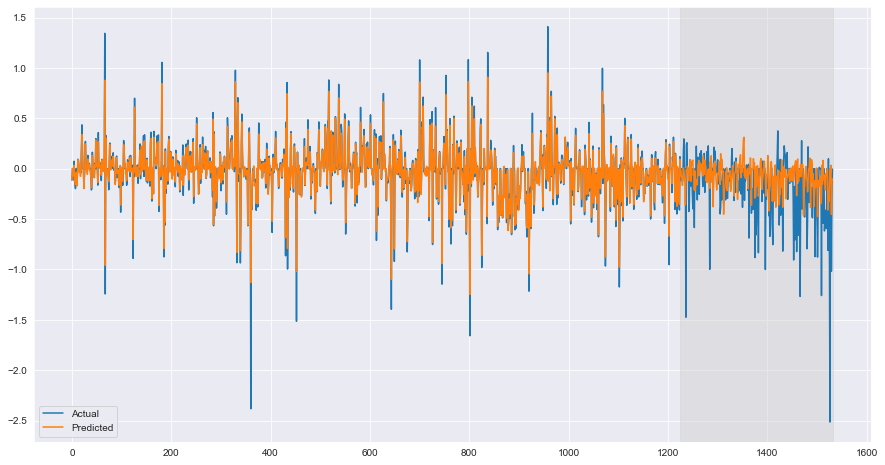

In [30]:
plt.figure(figsize=(15, 8))
plt.plot(y.values, label="Actual")
plt.plot(model.predict(X), label="Predicted")
plt.axvspan(int(len(X) * (1 - test_size)), len(X), alpha=0.5, color='lightgrey')
plt.legend();